**Loading Dataset for Time Series**

In [31]:
import pandas as pd 
import numpy as np 

In [32]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
data = pd.read_csv(url, header = 0, index_col = 0, parse_dates = True, squeeze = True)

In [33]:
data.head().to_frame()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


**Time Series Visualization**

In [34]:
link = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
data1 = pd.read_csv(link, header = 0, index_col = 0, parse_dates = True, squeeze = True)
data1.head().to_frame()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [35]:
import matplotlib.pyplot as plt

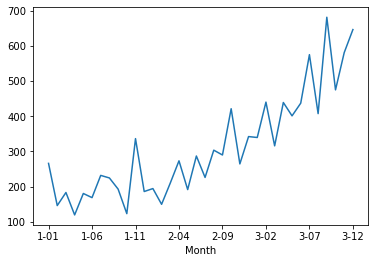

In [47]:
data1.plot(kind = 'line')
plt.show()

**Making Baseline Prediction for Time Series Forcasting**

In [48]:
values = pd.DataFrame(data1.values)
df = pd.concat([data1.shift(1), data1], axis = 1)
df.columns = ['t-1', 't+1']
df.head()

,t-1,t+1
Month,,
1-01,NaN,266.0
1-02,266.0,145.9
1-03,145.9,183.1
1-04,183.1,119.3
1-05,119.3,180.3


In [50]:
x = df.values
train_size = int(len(x) * .65)

In [52]:
train, test = x[1:train_size], x[train_size:]
x_train, y_train = train[:,0], train[:,1]
x_test, y_test = test[:,0], test[:,1]

In [53]:
def persistence(x):
    return x 

In [54]:
predictions = []
for x in x_test:
    yhat = persistence(x)
    predictions.append(yhat)

In [55]:
from sklearn.metrics import mean_squared_error as mse

In [56]:
test_score = mse(y_test, predictions)
print('mse: '+str(test_score))

mse: 17730.51846153846


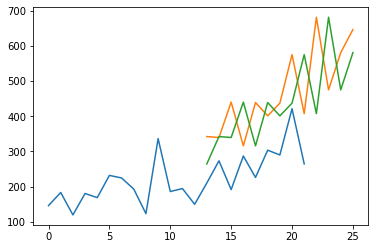

In [58]:
plt.plot(y_train)
plt.plot([None for i in x_test]+[x for x in y_test])
plt.plot([None for i in x_test]+[x for x in predictions])
plt.show()